FEATURE EXTRACTION EXAMPLE

This notebook contains an example of how to extract Mel-frequency cepstral coefficient (MFCC) features from the sound data in the dataset.
This example uses parameters similar to those define in the paper: Salamon J, Jacoby C, Bello JP. A dataset and taxonomy for urban sound research. In Proceedings of the 22nd ACM international conference on Multimedia 2014 Nov 3 (pp. 1041-1044).

This example peforms the following steps:
- Resample the sound recording to a target sampling rate of 44,100 kHz
- Zero-pad the sound recording to a duration of 4 seconds
- Compute the MFCCs

The following example is highly NOT optimized and it may serve just as a starting point for your solution.
You are strongly encouraged to consider different paramters and approaches to pre-process the data.

In [1]:
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import numpy as np

Finds all .wav flies in fold1

In [2]:
for i in range(1,11):
    _wav_dir_="../UrbanSound8K/audio/fold" + str(i) + "/"
    files = librosa.util.find_files(_wav_dir_)
    print(f"fold {i}: {len(files)}")

fold 1: 873
fold 2: 888
fold 3: 925
fold 4: 990
fold 5: 936
fold 6: 823
fold 7: 838
fold 8: 806
fold 9: 816
fold 10: 837


In [49]:
for f in files:
    print(str(f)[83:])

100648-1-0-0.wav
100648-1-1-0.wav
100648-1-2-0.wav
100648-1-3-0.wav
100648-1-4-0.wav
100795-3-0-0.wav
100795-3-1-0.wav
100795-3-1-1.wav
100795-3-1-2.wav
101382-2-0-10.wav
101382-2-0-12.wav
101382-2-0-20.wav
101382-2-0-21.wav
101382-2-0-29.wav
101382-2-0-33.wav
101382-2-0-42.wav
101382-2-0-45.wav
102103-3-0-0.wav
102103-3-1-0.wav
102857-5-0-0.wav
102857-5-0-1.wav
102857-5-0-10.wav
102857-5-0-11.wav
102857-5-0-12.wav
102857-5-0-13.wav
102857-5-0-14.wav
102857-5-0-15.wav
102857-5-0-16.wav
102857-5-0-17.wav
102857-5-0-18.wav
102857-5-0-19.wav
102857-5-0-2.wav
102857-5-0-20.wav
102857-5-0-21.wav
102857-5-0-22.wav
102857-5-0-23.wav
102857-5-0-24.wav
102857-5-0-25.wav
102857-5-0-26.wav
102857-5-0-27.wav
102857-5-0-28.wav
102857-5-0-29.wav
102857-5-0-3.wav
102857-5-0-30.wav
102857-5-0-4.wav
102857-5-0-5.wav
102857-5-0-6.wav
102857-5-0-7.wav
102857-5-0-8.wav
102857-5-0-9.wav
103438-5-0-0.wav
103438-5-0-1.wav
103438-5-0-2.wav
106014-5-0-0.wav
106014-5-0-1.wav
106014-5-0-2.wav
106014-5-0-3.wav
10

In [50]:
metadata = "../UrbanSound8K/metadata/UrbanSound8K.csv"
metadata_df = pd.read_csv(metadata)

In [46]:
vari = metadata_df[str(files[0])[82:]==metadata_df['slice_file_name']]['class']
print(vari)
arr = [vari]
print(arr[0] == 'dog_bark')
print(arr[0].values[0])
print(type(arr[0].values[0]))

64    dog_bark
Name: class, dtype: object
64    True
Name: class, dtype: bool
dog_bark
<class 'str'>


False

Parameters

In [3]:
# resampling freq
target_rate = 1000

# MFCC parameters
n_mfcc=40
hop_length=round(target_rate*0.0125)
win_length=round(target_rate*0.023)
n_fft=2**14
mfcc_time_size = 4*target_rate//hop_length+1

# read all wav file without resampling
dataset=np.zeros(shape=[len(files),4*target_rate])
dataset_mfcc=np.zeros(shape=[len(files),n_mfcc,mfcc_time_size])

## Main loop. 
It might last few minutes

In [5]:
i=0
for f in files:
    sig, rate = librosa.load(f, sr=None)
    new_signal = librosa.resample(sig, orig_sr=rate, target_sr=target_rate)  # resampling
    # zero padding
    if len(new_signal)<4*target_rate:    # se o novo sinal é menor que 4 segundos, fazemos "zero padding"
        new_signal_pad = np.concatenate((new_signal, np.zeros(4*target_rate-len(new_signal))),axis=0)   # acrescentar zeros no final do array para terem todos o mesmo tamanho (correspondente a 4 segundos)
    else:
        new_signal_pad=new_signal
    dataset[i]=new_signal_pad   # colocar sinal no dataset
    # computes the MFCCs
    sig_mfcc =librosa.feature.mfcc(y=new_signal_pad,sr=target_rate,n_fft=n_fft,hop_length=hop_length,win_length=win_length,n_mfcc=n_mfcc)
    dataset_mfcc[i]=sig_mfcc    # colocar extracted features no dataset
    i+=1

c:\Users\gapmd\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=16384 is too large for input signal of length=4000
  warnings.warn(


Visualization of an example

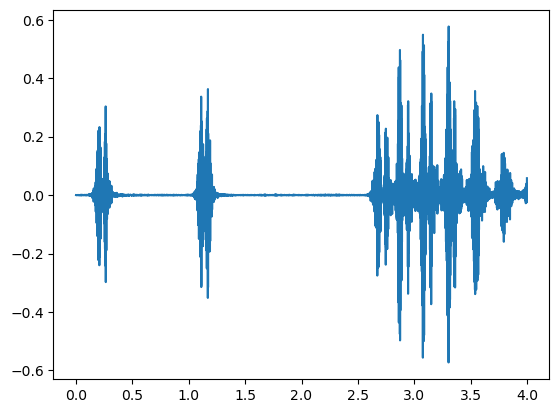

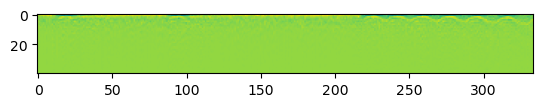

In [6]:
index=0
plt.figure()
plt.plot(np.asarray(list(range(4*target_rate)))/target_rate,dataset[index])
plt.show()

plt.figure()
plt.imshow(dataset_mfcc[index])
plt.show()
